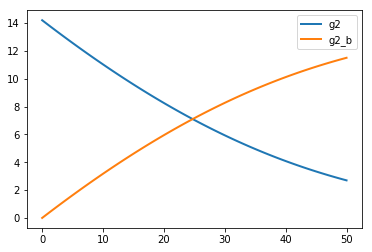

In [133]:
import tellurium as te
import numpy as np
# degradation
diff_model = te.loada('''
    g1 = 0.1; # initial concentration of BMP2
    g2 = 14.2; # initial concentratin of TGF-b1
    c_c = 0.1; # corrosponds to cell number of 1000 in 1cm2

    #g1 -> g1_e; r_d*(g1-g1_min); g1_min = 0.008; r_d = 0.1;  #
    g1 -> g1_d;  d1*g1; d1 = ln(2)/T1; T1 = 10;               # half life of BMP2
    g1 -> g1_p; -r1*c_c*g1/(K_p_1+g1) ; r1 = 1; K_p_1 = 0.08; # production of BMP2
    
    g2 -> g2_b; c_c*V_max*g2/(K_b+g2);K_b = 25;V_max = (1.43*100)/24; #consumption due to background
    #g2 -> g2_e; delta_p*(g2-g2_min) ; g2_min = 14.2; delta_p = 0.1; #consumption due to events
    #g2 -> g2_d; d2*g2; d2 = ln(2)/T2; T2 = 0.16;                    #degradation of TGF-b1
    #g2 -> g2_p; -r2*c_c*g2/(K_p_2+g2) ; r2 = 2000; K_p_2 = 25;      #production of TGF-b1
''')
# selections = ['time'] + ['g1',  'g1_d',  'g1_e']
selections = ['time'] + ['g2','g2_b']
# selections = ['time']+diff_model.getFloatingSpeciesIds()

diff_model.simulate(0, 50, 100,selections = selections)
diff_model.plot()

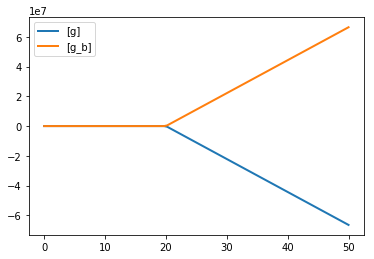

In [74]:
import tellurium as te
import numpy as np

r = te.loada('''
    v_max = 0.1;
    k = 1;
    g = 1;
    g -> g_b; v_max/(k*g+1);
''')
r.simulate(0, 50, 100)
r.plot()